In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv('../data/raw/Dataset-1.csv')
X=df.drop('Class',axis=1)
Y=df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [5]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [6]:
smote=SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

print("Before SMOTE:",np.bincount(Y_train))
print("After SMOTE:",np.bincount(Y_train_res))

Before SMOTE: [227451    394]
After SMOTE: [227451 227451]


MODEL 1:LOGISTIC REGRESSION



In [7]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_res,Y_train_res)

y_pred_lr=model.predict(X_test_scaled)
y_prob_lr=model.predict_proba(X_test_scaled)[:,1]

print("Logistic Regression Classification Report:")
print(classification_report(Y_test,y_pred_lr))
print("Logistic Regression ROC-AUC Score:",roc_auc_score(Y_test,y_prob_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Logistic Regression ROC-AUC Score: 0.9708434302252134


MODEL 2 :RANDOM FOREST


In [8]:
rf=RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_res,Y_train_res)

rf_pred=rf.predict(X_test_scaled)
rf_prob=rf.predict_proba(X_test_scaled)[:,1]

print("Random Forest Classification Report:")
print(classification_report(Y_test,rf_pred))
print("Random Forest ROC-AUC Score:",roc_auc_score(Y_test,rf_prob))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.86      0.55        98

    accuracy                           1.00     56962
   macro avg       0.70      0.93      0.77     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest ROC-AUC Score: 0.9827043472144064


MODEL 3 : XGBOOST

In [9]:
xbg_model=xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    col_Sample_bytree=0.8,
    eval_metric='logloss'
)

xbg_model.fit(X_train_res,Y_train_res)

xbg_pred=xbg_model.predict(X_test_scaled)
xbg_prob=xbg_model.predict_proba(X_test_scaled)[:,1]

print("XGBoost Classification Report:")
print(classification_report(Y_test,xbg_pred))
print("XGBoost ROC-AUC Score:",roc_auc_score(Y_test,xbg_prob))

c:\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:18:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "col_Sample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost ROC-AUC Score: 0.9708095147175357


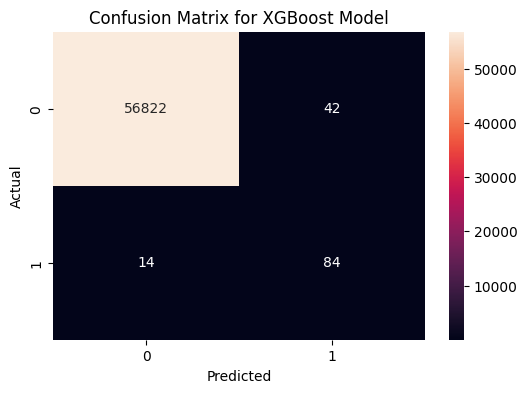

In [11]:
cm=confusion_matrix(Y_test, xbg_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

KEY INSIGHTS:
XGB MODEL OUTPERFOMED LOGISTIC REGRESSION AND RANDOM FOREST BY ACHIEVING THE HIGHEST RECALL AND ROC-AUC SCORE , MAKING IT THE MOST SUITABLE MODEL FOR MINIMISING FALSE NEGATIVES IN FRAUD DETECTION